# K-Nearest Neighbors
## What is it?
K-Nearest neighbors is a widely-used supervised machine learning algorithm used mainly for classification. It works on the assumption that similar data exist in close proximity within the feature space. When given new data, the algorithm finds the k-nearest data points (neighbors) and makes prediction based on the majority class.
Note: It is a non-parametric method, which means that it does not have particular assumptions about the distribution of the used data.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/refs/heads/main/KNN_general.png" width=500 height=200 />

## Decision Boudary

A decision boundary is the imagenary line that separates the difference classes in question. In other words, it is the set of points at whichc the decision criterion is exactly equal for two or more classes. In order to calculate it, KNN needs to know two important things, the number of neighbors you wish to consider (K) and the distance calculation method.
### K
Based on the chosen number of neighbors, the model can have different performance. When K is **low**, it will lead to complex decision boundary, and possibly over fitting, while **high** K values, will lead to a smooth decision boundary that is less sensitive to single data points, which can lead to underfitting.


<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/refs/heads/main/KNN_DecisionAndK.png" width=617 height=200 />

### Distance Metrics
In order to identify the nearest points, we need some distance metric. There are a number of 

##### Calculating Euclidean Distance
The formula for calculating euclidean distance for the features x,y, ..., n is given as follows:

$Distance (a,b) = \sqrt{(x_a - x_b)^2+(y_a - y_b)^2 + ... +(n_a - n_b)^2}$

Other distance metrics can be used, such as Manhattan distance, but euclidean distance is a good starting point, and is the default for scikit-learn KNN algorithm.

------




### About the dataset
The Iris flower data set, introduced by Ronald Fisher in 1936, contains measurements of 50 samples from three Iris species (setosa, virginica, and versicolor). Four features—sepal length, sepal width, petal length, and petal width—were measured for each sample. Fisher used this data to develop a linear discriminant model for classifying the species. Refer to [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more information.

#### Import required libraries and functions

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

sns.set(style="darkgrid")
sns.set_context("paper")


#### Load the dataset, and have a general look

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


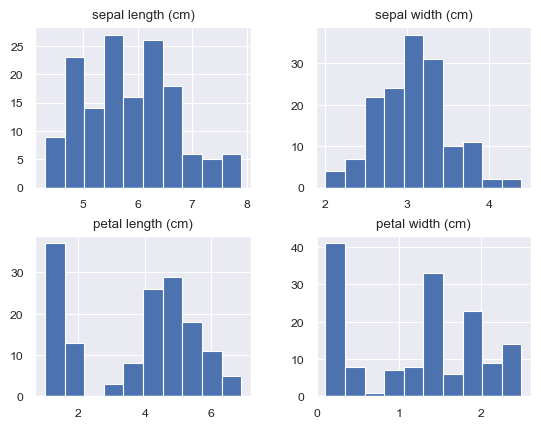

In [86]:
iris = load_iris()

irisDF = pd.DataFrame(iris['data'], columns = iris['feature_names'])

irisDF.hist()
irisDF

### Split the data into training and testing

In [130]:
# Create feature and target arrays 
X = iris.data[:,0:2] # To be better visualized
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=100) 


### Run the model on the training dataset and find best K

In [131]:
knn = KNeighborsClassifier()

# Define a parameter grid to search over
param_grid = {'n_neighbors': [3, 5]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_neighbors = grid_search.best_params_['n_neighbors']

# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.7666666666666667


### Test the model on the testing dataset

In [139]:
pred_y = best_model.predict(X_test)
accuracy = np.average(pred_y == y_test)
print(f"Model Accuracy = {accuracy}")

Model Accuracy = 0.8


### Visualize the results

C:\Users\Sawalma_A\AppData\Local\Temp\ipykernel_15904\4160008103.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label="Test data")


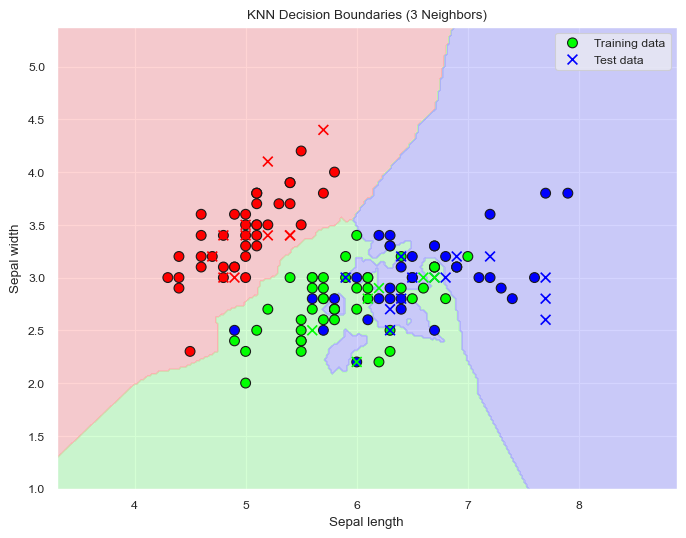

In [143]:

# Create a mesh to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light,alpha = 0.5)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50, label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label="Test data")

# Add labels and title
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN Decision Boundaries ({best_neighbors} Neighbors)')
plt.legend(loc='upper right')
plt.show()

## Advantages and Disadvantages of KNN
#### Advantages
- Simple, easily applied and easily interpritable
- No prior assumptions about data distribution
- Can handle numerical or categorical data
- Few hyperparameters to tweak (mainly, you need to choose K and the distance metric)
#### Disadvantages
- Computationally costly: All computations will need to include all training examples for every new point to be predicted
- Prone to overfitting. Therefore, it might be used with feature selection and dimensionality reduction methods


# Resources
[Geeks for Geeks #1](https://www.geeksforgeeks.org/k-nearest-neighbours/)

[Geeks for Geeks #2](https://www.geeksforgeeks.org/k-nearest-neighbours/)

[Scikit-Learn website](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

For Regression KNN: [go to this website](https://realpython.com/knn-python/#the-abalone-problem-statement)


